## Домашнее задание 

### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [19]:
import pickle
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

with open('clustering.pkl', 'rb') as f:
    data = pickle.load(f)
    
X = np.array(data['X'])

km = KMeans(n_clusters=4, random_state=17)
model1 = km.fit(X)
print('Score with k=4:',silhouette_score(X, model1.labels_))

km = KMeans(n_clusters=2, random_state=17)
model2 = km.fit(X)
print('Score with k=2:',silhouette_score(X, model2.labels_))

#Хуже

Score with k=4: 0.4388619866610211
Score with k=2: 0.4465356047465253


### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [5]:
from sklearn.metrics import adjusted_mutual_info_score as ami

Y = np.array(data['Y'])
print('Score with k=4:', ami(Y, model1.labels_))
print('Score with k=2:', ami(Y, model2.labels_))

#Хуже

Score with k=4: 0.581591653951793
Score with k=2: 0.9286022516535728


### Задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

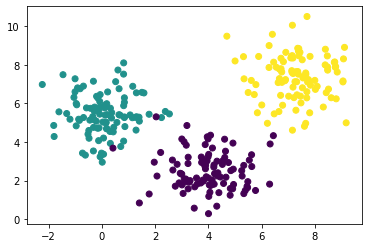

In [7]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv('7.10_clustering_hw.csv')

plt.scatter(df['x1'], df['x2'], c=df['y'])
plt.show()

In [25]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

metrics = []
MAX_CLUSTERS = 11
X = np.array(df['x1']).reshape(-1, 1)
X = np.concatenate((X, np.array(df['x2']).reshape(-1,1)), axis=1)
X
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.897378110108
cluster_num 2, metric 663.5712032768099
cluster_num 3, metric 374.6589714184063
cluster_num 4, metric 348.17052724059585
cluster_num 5, metric 323.0909288942993
cluster_num 6, metric 300.10388486033406
cluster_num 7, metric 285.174378913842
cluster_num 8, metric 267.0751842463467
cluster_num 9, metric 248.1534520215813
cluster_num 10, metric 236.73537936047083


best cluster num: 3


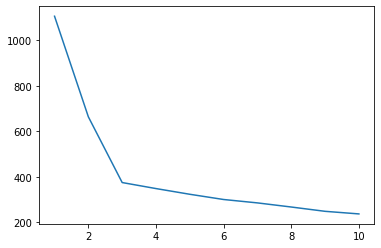

In [26]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

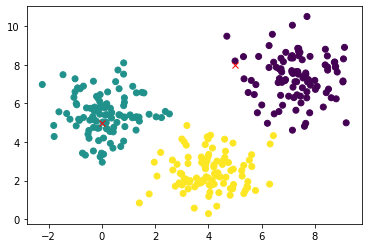

In [31]:
kmean = KMeans(n_clusters=np.argmin(D)+1, random_state=17)
model = kmean.fit(X)

plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.plot(5, 8, marker='x', color='r')
plt.plot(0, 5, marker='x', color='r')
plt.show()
#К разным кластерам

In [33]:
print('AMI score:', ami(df['y'], kmeans_model.labels_))
#Выше 0.5 - модель хорошая

AMI score: 0.6163945294290587


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)